# Tarea 5

## Primera parte: Integrales

Evaluar la siguiente integral 

\begin{equation}
I = \int_{-1}^{1} {x^4+ sin^2(x)} dx
\end{equation}

* Sumas de Riemann

## Segunda parte: FFT


Suponga que encedemos una luz en el tiempo $ t = t_0 − τ /2$ y la volvemos a apagar en el tiempo $t = t_0 + τ /2$, donde $t_0 $ y τ son
parametros constantes. La luz emitida en este periodo de tiempo tiene frecuencia ν_0, la cual tambien es un parametro constante.
El campo electrico emitido tiene la forma

\begin{equation}
E(t) = E_0e−2iπν_0t
\end{equation}

si $t_0 − τ/2 ≤ t ≤ t_0 + τ/2$. E(t) = 0 de otra forma. 

Aplique la transformada de Fourier rapida para encontrar la forma del campo en el espacio de frecuencias. Es decir, queremos
evaluar de forma numerica

\begin{equation}
E(ν) =\int_{t_0+τ /2}^{t_0−τ /2}
dνE_0e^{2πi}(ν−ν_0)t 
\end{equation}

Realice un gr´afico de E(t)/E0 y de ˆE(ν)/E0. Note que estos campos son complejos, realice un gr´afico de ambas partes real
e imaginaria. Utilice los siguientes par´ametros: τ = 1s, t0 = 10s, ν0 = 5 Hz.

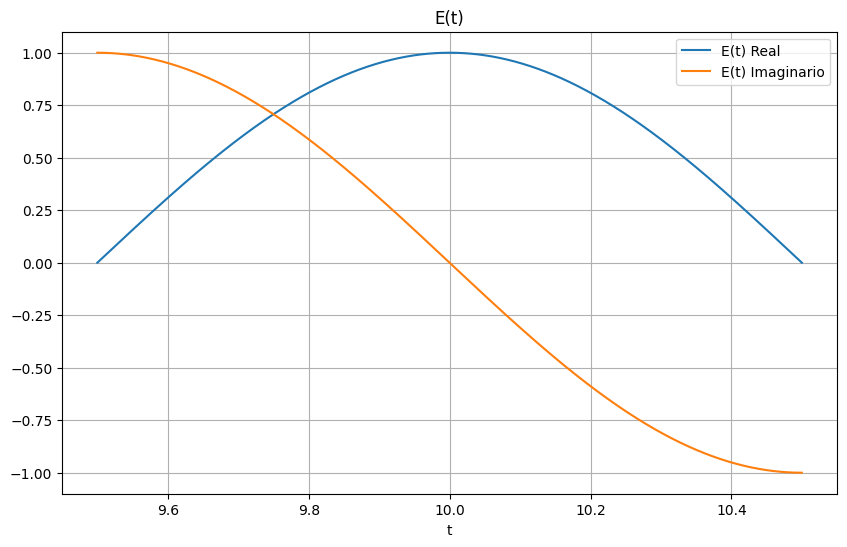

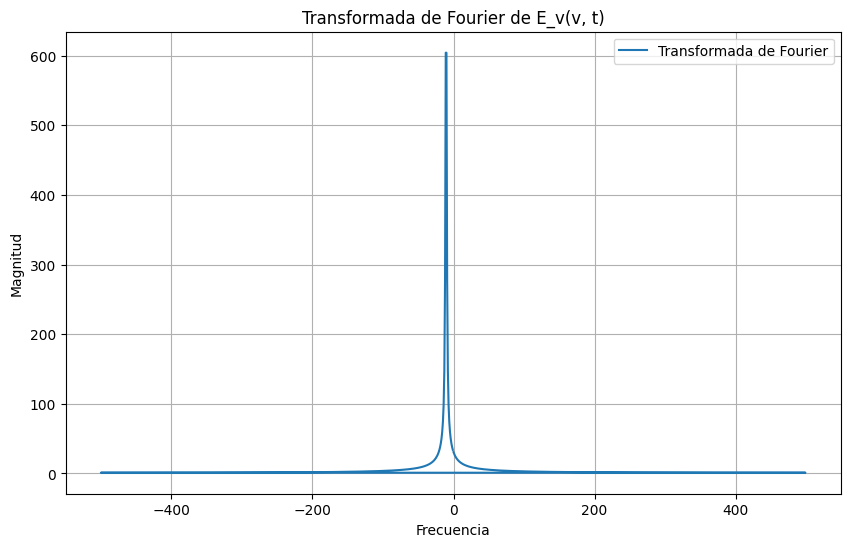

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def E_v(v, t):
    return np.exp(-2 * np.pi * 1j * (v - 5) * t)

def E(t):
    return np.exp(-2 * np.pi * 1j * 0.5 * t)

# Listas
t = np.linspace(9.5, 10.5, 1000)
v = np.arange(5, 6, 0.001)
x_real = np.zeros(1000)
x_imag = np.zeros(1000)

# Ejecución del Código
for i in range(len(t)):
    x_real[i] = E(t[i]).real
    x_imag[i] = E(t[i]).imag

# Graficar E(t)
plt.figure(figsize=(10, 6))
plt.plot(t, x_real, label='E(t) Real')
plt.plot(t, x_imag, label='E(t) Imaginario')
plt.title('E(t)')
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.show()

# Calcular la transformada de Fourier de E_v
fourier_array = np.fft.fft(E_v(v, t))

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(v), d=(v[1] - v[0]))

# Graficar la transformada de Fourier
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fourier_array), label='Transformada de Fourier')
plt.title('Transformada de Fourier de E_v(v, t)')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.legend()
plt.grid(True)
plt.show()


## Tercera parte: Ecuaciones parabolicas

Ecuacion de Laplace en dos dimensiones para el potencial electrostatico $φ = φ(x, y)$
\begin{equation}
\frac{∂φ^2}{∂x^2 }+ \frac{∂φ^2}{∂y^2 } = 0
\end{equation}
Para una placa cuadrada 10cmx10cm con el metodo de relajacion de Jacobi hasta converger con una tolerancia de 10−5.

In [14]:
import numpy as np

def jacobi_relaxation(M, V, tolerance):
    # Primero creamos los arreglos 2-dimensionales de la grilla
    # Vamos a necesitar dos según la regla de Jacobi
    # Note que usamos M+1, debido a que debemos contener la condición de frontera
    # phi contiene inicialmente los valores iniciales. Vamos a utilizar ceros.
    phi = np.zeros((M + 1, M + 1), dtype=float)
    # Ahora tenemos que colocar la condición inicial.
    # phiprime se necesita para la iteración
    phiprime = np.zeros((M + 1, M + 1), dtype=float)
    # Iteración de Jacobi
    delta = 1.0
    its = 0
    while delta > tolerance:
        # Calculamos la iteración
        its += 1
        for i in range(M):
            for j in range(M):
                # Condición de frontera
                if j == 20 or j == 80:
                    if i >= 20 and i <= 80:
                        if j == 20:
                            phi[i,j] = V
                        else:
                            phi[i,j] = -V
                else:
                    phiprime[i,j]= (0.25)*(phi[i + 1,j]+phi[i - 1,j]+phi[i,j + 1]+phi[i,j - 1])
        # Calculamos la diferencia máxima con respecto a los valores anteriores
        delta = np.max(np.abs(phi - phiprime))
        # Ahora intercambiamos los arreglos para la nueva iteración
        # El nuevo phi es el phiprime
        temp = phi
        phi = phiprime
        # El nuevo phiprime es el phi viejo
        phiprime = temp
        
    return phi, its

In [15]:
jacobi_vals, iterations = jacobi_relaxation(100, 1, 1e-5)
print(iterations)

1751


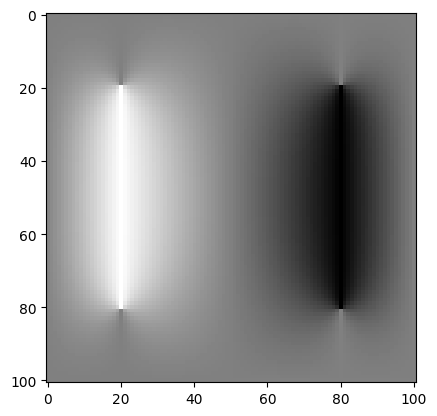

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(jacobi_vals)
plt.gray()
plt.show()